# importing pakages


In [5]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix , classification_report
!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import KFold , cross_val_score
from sklearn.model_selection import GridSearchCV

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.0 MB/s eta 0:00:00a 0:00:01


# loading the dataset


In [6]:
url = "https://raw.githubusercontent.com/ronydebnath/STDS-15/main/Dataset/heart_2020_cleaned.csv?token=GHSAT0AAAAAACHSU2OQOR67NPLGHE3UPBIIZIJGDTA"
df = pd.read_csv(url)

# genral info about the dataset


In [7]:
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [8]:
df.shape

(319795, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

there is no null object in our dataset

In [10]:
# cheking the duplicate
df.duplicated().sum()

18078

In [11]:
# genral discription about our dataset
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [12]:
df['AgeCategory'].value_counts()


65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

# changing values(yes,no)into numeric values 0,1

In [13]:
df['AgeCategory'] = df['AgeCategory'].str[:2]


In [14]:
df=df.replace('No','0')
df= df.replace('Yes','1')
df=df.replace('Female','0')
df= df.replace('Male','1')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25,Hispanic,0,0,Good,12.0,0,0,0


# changing genral health inot numeric values 

In [15]:
df['GenHealth']=df['GenHealth'].replace('Poor','0')
df['GenHealth']=df['GenHealth'].replace('Fair','1')
df['GenHealth']=df['GenHealth'].replace('Good','2')
df['GenHealth']=df['GenHealth'].replace('Very good','3')
df['GenHealth']=df['GenHealth'].replace('Excellent','4')

In [16]:
df["Diabetic"]=df['Diabetic'].replace('No, borderline diabetes','3')
df["Diabetic"]=df['Diabetic'].replace('Yes (during pregnancy)','4')

In [17]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55,White,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,White,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,White,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,White,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,White,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60,Hispanic,1,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35,Hispanic,0,1,3,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45,Hispanic,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25,Hispanic,0,0,2,12.0,0,0,0


In [18]:
x = df.drop(['HeartDisease','Race'],axis = 1)


In [19]:
y = df['HeartDisease']


In [20]:
x


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,55,1,1,3,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,80,0,1,3,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,65,1,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,75,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,40,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,60,1,0,1,6.0,1,0,0
319791,29.84,1,0,0,0.0,0.0,0,1,35,0,1,3,5.0,1,0,0
319792,24.24,0,0,0,0.0,0.0,0,0,45,0,1,2,6.0,0,0,0
319793,32.81,0,0,0,0.0,0.0,0,0,25,0,0,2,12.0,0,0,0


In [21]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               319795 non-null  float64
 1   Smoking           319795 non-null  object 
 2   AlcoholDrinking   319795 non-null  object 
 3   Stroke            319795 non-null  object 
 4   PhysicalHealth    319795 non-null  float64
 5   MentalHealth      319795 non-null  float64
 6   DiffWalking       319795 non-null  object 
 7   Sex               319795 non-null  object 
 8   AgeCategory       319795 non-null  object 
 9   Diabetic          319795 non-null  object 
 10  PhysicalActivity  319795 non-null  object 
 11  GenHealth         319795 non-null  object 
 12  SleepTime         319795 non-null  float64
 13  Asthma            319795 non-null  object 
 14  KidneyDisease     319795 non-null  object 
 15  SkinCancer        319795 non-null  object 
dtypes: float64(4), objec

In [22]:
x=x.astype('float32')


In [23]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               319795 non-null  float32
 1   Smoking           319795 non-null  float32
 2   AlcoholDrinking   319795 non-null  float32
 3   Stroke            319795 non-null  float32
 4   PhysicalHealth    319795 non-null  float32
 5   MentalHealth      319795 non-null  float32
 6   DiffWalking       319795 non-null  float32
 7   Sex               319795 non-null  float32
 8   AgeCategory       319795 non-null  float32
 9   Diabetic          319795 non-null  float32
 10  PhysicalActivity  319795 non-null  float32
 11  GenHealth         319795 non-null  float32
 12  SleepTime         319795 non-null  float32
 13  Asthma            319795 non-null  float32
 14  KidneyDisease     319795 non-null  float32
 15  SkinCancer        319795 non-null  float32
dtypes: float32(16)
memor

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)

In [25]:
y.value_counts()


0    292422
1     27373
Name: HeartDisease, dtype: int64

<AxesSubplot:ylabel='HeartDisease'>

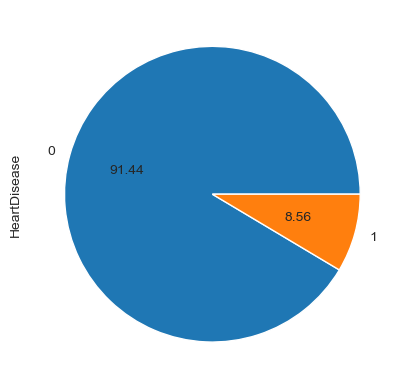

In [26]:
 y.value_counts().plot.pie(autopct = '%0.2f')


In [27]:
from imblearn.under_sampling import RandomUnderSampler


ModuleNotFoundError: No module named 'imblearn'

In [ ]:
RUS = RandomUnderSampler(sampling_strategy=1)


In [ ]:
x_res , y_res = RUS.fit_resample(x_train,y_train)


In [ ]:
y_res.value_counts().plot.pie(autopct='%.2f')


In [ ]:
y_res.value_counts()


In [ ]:
x_res


# desicion tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt = DecisionTreeClassifier(max_depth = 5 , max_features= 4)


In [ ]:
dt.fit(x_res,y_res)


In [ ]:
dt.score(x_res,y_res)


In [ ]:
dt.score(x_test,y_test)


In [ ]:
y_pred = dt.predict(x_test)


# evaluation

In [ ]:
con = confusion_matrix(y_test , y_pred)
con



In [ ]:
plot_confusion_matrix(con )


In [ ]:
print (classification_report(y_test , y_pred))


In [ ]:
# cross validation

In [ ]:
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(dt , x,y , cv = K_fold , scoring= scoring)
print (score)

In [ ]:
round(np.mean(score)*100 , 2)


# random oversampleing 

# logistic regression


In [ ]:
from imblearn.over_sampling import RandomOverSampler


In [ ]:
ROS = RandomOverSampler(sampling_strategy = 1)


In [ ]:
x_res, y_res = ROS.fit_resample(x_train,y_train)

In [ ]:
y_res.value_counts().plot.pie(autopct = "%.2f")


In [ ]:
y_res.value_counts()


In [ ]:
#logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
LOG = LogisticRegression().fit(x_res, y_res)


In [ ]:
LOG.score(x_res,y_res)


In [ ]:
LOG.score(x_test,y_test)


In [ ]:
y_pred= LOG.predict(x_test)


In [ ]:
#Evaluation¶


In [ ]:
con = confusion_matrix(y_test , y_pred)
con

In [ ]:
plot_confusion_matrix(con )


In [ ]:
print (classification_report(y_test , y_pred))


In [ ]:
#cross validation

In [ ]:
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(LOG , x,y , cv = K_fold , scoring= scoring)
print (score)


In [ ]:
round(np.mean(score)*100 , 2)


# Random Forest Classifier


In [ ]:
from imblearn.over_sampling import SMOTE 
sm= SMOTE()


In [ ]:
x_res,y_res = sm.fit_resample(x_train,y_train)


In [ ]:
y_res.value_counts().plot.pie(autopct='%.2f')

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf = RandomForestClassifier(n_estimators= 4 , max_depth=3 ,max_features= 4)


In [ ]:
rf.fit(x_res,y_res)


In [ ]:
rf.score(x_res,y_res)


In [ ]:
rf.score(x_test,y_test)


In [ ]:
y_pred = rf.predict(x_test)


In [ ]:
#Evaluation¶


In [ ]:
con = confusion_matrix(y_test , y_pred)
con

In [ ]:
plot_confusion_matrix(con )


In [ ]:
print (classification_report(y_test , y_pred))


# cross validation

In [ ]:
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(rf , x,y , cv = K_fold , scoring= scoring)
print (score)

In [ ]:
round(np.mean(score)*100 , 2)


In [ ]:
pram_grid = {"max_depth": [2,3,4] , 'max_features': [3,4,5] }


In [ ]:
pram_grid


In [ ]:
clf = DecisionTreeClassifier()
grid = GridSearchCV(estimator= clf , param_grid= pram_grid , cv = 5 )
grid_result = grid.fit(x_train , y_train)

grid_result

In [ ]:
print ("Best: %f using %s" %(grid_result.best_score_ , grid_result.best_params_))

In [ ]:
model = grid_result.best_estimator_
model


In [ ]:
model.predict(x_test)


In [ ]:
con = confusion_matrix(y_test , model.predict(x_test) )
con

In [ ]:
plot_confusion_matrix(con )


In [ ]:
print (classification_report(y_test , model.predict(x_test)))


In [ ]:
# standaed scalar


In [ ]:
# Standardization of numeric data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_res)

X_train_scaled = scaler.transform(x_res)
X_test_scaled = scaler.transform(x_test)

X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=x_res.columns)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=x_test.columns)
X_test_scaled.describe()